![image](safra.jpg)

## Candidato: Lucas Brasileiro Casarin

### Prova de proficiência em Python Safra Asset

**Q1.1.** Usando o python importe os dados de preço de fechamento de 01/01/2018 até 01/01/2022 das ações que compõem o indice IBRX 50 hoje. Preencha dados faltantes de cada série com as médias dos vizinhos. Mostre que o DataFrame resultante não tem valores vazios.


Descomente uma linha da célula abaixo caso seja necessário instalar alguma das bibliotecas.

In [3]:
#pip install yfinance
#!pip install selenium
#!pip install pandas

     ---------------------------------------- 6.7/6.7 MB 35.5 MB/s eta 0:00:00
     ---------------------------------------- 384.9/384.9 kB ? eta 0:00:00
     ---------------------------------------- 58.3/58.3 kB 3.2 MB/s eta 0:00:00


In [4]:
import yfinance as yf
import pandas as pd
import selenium 
import matplotlib.pyplot as plt
from datetime import datetime
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import Select
import time

### Função que obtem as ações que compõem o índice a partir do site da B3

A função "pega_tickers" utiliza a biblioteca selenium para consultar a tabela disponibilizada pela B3 da atual composição do IBRX50.

In [8]:
def pega_tickers():
    #Definição dos objetos para uso da consulta com o navegador chrome.
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_driver_path ="C:\selenium\chromedriver_win32\chromedriver.exe"
    service = Service(executable_path=chrome_driver_path)

    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.get('https://sistemaswebb3-listados.b3.com.br/indexPage/day/IBXL?language=pt-br')

    time.sleep(2)
    
    #necessidade de selecionar o botão de visualização para 60 itens, a fim de pegar
    #todos os tickers do índice.
    button = driver.find_elements(By.TAG_NAME,'select')[1]
    for opt in button.find_elements(By.TAG_NAME,'option'):
        if opt.text == '60':
            opt.click()

    time.sleep(2)
    
    #armazenamento do html com a tabela que exibe todos as ações do índice.
    page = driver.page_source

    tabela_acoes = pd.read_html(page)[0]
    #As últimas linhas da tabela não contém as informações dos tickers e a tabala atual possuia apenas 49 ações
    #
    tabela_acoes = tabela_acoes.loc[(tabela_acoes['Código']!= 'Quantidade Teórica Total')&(tabela_acoes['Código']!= 'Redutor')]
    tickers = tabela_acoes['Código'].values
    tickers = [ticker + ".SA" for ticker in tickers]

    return tickers

In [9]:
tickers = pega_tickers()

### Preenchimento dos valores vazios 

A função **fillna_with_neighbor_mean** recebe uma **série de dados** (um conjunto de valores em uma sequência indexados no tempo) como entrada e retorna a mesma série com os **valores faltantes (NaN) preenchidos**.

A função utiliza o método **interpolate** do **Pandas**, que preenche os valores faltantes com base nos valores existentes ao redor do valor faltante. O método **"linear"** utilizado na interpolação significa que os valores faltantes serão preenchidos com base na média dos valores vizinhos, de modo a ignorar os índices.

O parâmetro **limit_direction="both"** indica que a interpolação deve ser aplicada tanto **para frente quanto para trás** na série, ou seja, preenche os valores faltantes considerando os vizinhos à direita e à esquerda do valor faltante.

Em resumo, a função **fillna_with_neighbor_mean** preenche os valores faltantes (NaN) de uma série de dados com a **média dos valores vizinhos.**

In [10]:
start_date = "2018-01-01"
end_date = "2022-01-01"

data = yf.download(tickers, start=start_date, end=end_date)["Close"]

def fillna_with_neighbor_mean(series):
    return series.interpolate(method="linear", limit_direction="both")

data_filled = data.apply(fillna_with_neighbor_mean)

# Verificação de valores vazios
print('Valores vazios antes de preenchimento com interpolação: ')
print(data.isnull().sum())
print('Valores vazios após interpolação: ') 
print(data_filled.isnull().sum())

[*********************100%***********************]  50 of 50 completed
Valores vazios antes de preenchimento com interpolação: 
ABEV3.SA       0
ASAI3.SA     779
AZUL4.SA       0
B3SA3.SA       0
BBAS3.SA       0
BBDC4.SA       0
BBSE3.SA       0
BEEF3.SA       0
BPAC11.SA      0
BRFS3.SA       0
CCRO3.SA       0
CIEL3.SA       0
CMIG4.SA       0
CSAN3.SA       0
CSNA3.SA       0
CYRE3.SA       0
ELET3.SA       0
ELET6.SA       0
EMBR3.SA       0
ENEV3.SA       0
EQTL3.SA       0
GGBR4.SA       0
HAPV3.SA      79
HYPE3.SA       0
ITSA4.SA       0
ITUB4.SA       0
JBSS3.SA       0
KLBN11.SA      0
LREN3.SA       0
MGLU3.SA       0
MRFG3.SA       0
MULT3.SA       0
NTCO3.SA     487
PETR3.SA       0
PETR4.SA       0
PETZ3.SA     670
PRIO3.SA       0
RADL3.SA       0
RAIL3.SA       0
RDOR3.SA     732
RENT3.SA       0
RRRP3.SA     711
SBSP3.SA       0
SUZB3.SA       0
TOTS3.SA       0
USIM5.SA       0
VALE3.SA       0
VBBR3.SA      49
VIIA3.SA       0
WEGE3.SA       0
dtype: int64
Valores v

In [11]:
data_filled

,ABEV3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRFS3.SA,...,RENT3.SA,RRRP3.SA,SBSP3.SA,SUZB3.SA,TOTS3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,21.690001,14.28,27.150000,7.636666,32.930000,19.693554,28.700001,10.708080,4.725000,37.270000,...,21.676189,20.799999,34.599998,18.790001,10.030941,9.60,41.720001,22.629999,7.71,9.623076
2018-01-03,21.740000,14.28,27.059999,7.766666,33.349998,19.773239,28.719999,10.629416,4.770000,37.000000,...,21.971428,20.799999,33.980000,18.650000,10.243869,9.92,41.470001,22.629999,7.75,9.476923
2018-01-04,21.620001,14.28,27.230000,7.816666,33.669998,20.097670,28.780001,10.590085,4.787500,37.400002,...,22.285713,20.799999,33.320000,18.700001,10.180656,10.48,41.639999,22.629999,7.81,9.384615
2018-01-05,21.700001,14.28,27.200001,7.930000,33.669998,20.211506,28.969999,10.708080,4.692500,39.240002,...,21.961905,20.799999,33.700001,18.650000,10.400239,10.03,42.290001,22.629999,7.56,9.423076
2018-01-08,21.660000,14.28,26.910000,7.966666,33.750000,20.205814,29.139999,10.344261,4.750000,39.700001,...,21.857141,20.799999,34.389999,19.100000,10.393585,10.14,43.230000,22.629999,7.69,9.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.550000,14.09,26.459999,11.380000,29.219999,17.490910,20.620001,10.530000,21.459999,22.620001,...,54.750000,31.270000,39.889999,60.189999,28.740000,14.86,79.150002,21.040001,4.50,33.470001
2021-12-27,15.530000,13.64,25.670000,11.310000,29.280001,17.690908,20.750000,10.430000,21.480000,22.230000,...,55.049999,31.770000,40.049999,60.340000,28.809999,15.04,78.949997,21.309999,4.86,33.169998
2021-12-28,15.520000,13.10,25.750000,11.160000,29.110001,17.627272,20.790001,10.550000,20.719999,22.590000,...,53.549999,32.070000,40.040001,59.660000,28.320000,14.75,77.050003,21.469999,4.95,33.290001


**Q1.2.** Busque também o ajuste para os preços dos ativos. Escolha um ativo e mostre a diferença entre o preço ajustado e não ajustado, chamando atenção para os dados relevantes.

In [12]:
#buscar o preço ajustado com yfinance
data_adj = yf.download(tickers, start=start_date, end=end_date)["Adj Close"]
#preenchendo os valores vazios
data_adj_filled = data_adj.apply(fillna_with_neighbor_mean)
# Verificação de valores vazios
print('Valores vazios antes de preenchimento com interpolação:')
print(data_adj.isnull().sum())
print('Valores vazios após interpolação:')
print(data_adj_filled.isnull().sum())

[*********************100%***********************]  50 of 50 completed
Valores vazios antes de preenchimento com interpolação:
ABEV3.SA       0
ASAI3.SA     779
AZUL4.SA       0
B3SA3.SA       0
BBAS3.SA       0
BBDC4.SA       0
BBSE3.SA       0
BEEF3.SA       0
BPAC11.SA      0
BRFS3.SA       0
CCRO3.SA       0
CIEL3.SA       0
CMIG4.SA       0
CSAN3.SA       0
CSNA3.SA       0
CYRE3.SA       0
ELET3.SA       0
ELET6.SA       0
EMBR3.SA       0
ENEV3.SA       0
EQTL3.SA       0
GGBR4.SA       0
HAPV3.SA      79
HYPE3.SA       0
ITSA4.SA       0
ITUB4.SA       0
JBSS3.SA       0
KLBN11.SA      0
LREN3.SA       0
MGLU3.SA       0
MRFG3.SA       0
MULT3.SA       0
NTCO3.SA     487
PETR3.SA       0
PETR4.SA       0
PETZ3.SA     670
PRIO3.SA       0
RADL3.SA       0
RAIL3.SA       0
RDOR3.SA     732
RENT3.SA       0
RRRP3.SA     711
SBSP3.SA       0
SUZB3.SA       0
TOTS3.SA       0
USIM5.SA       0
VALE3.SA       0
VBBR3.SA      49
VIIA3.SA       0
WEGE3.SA       0
dtype: int64
Valores va

In [13]:
#escolhendo um ativo para demonstrar a diferença entre os preços ajustados e não ajustados
ticker = 'ITUB4.SA'
#criando tabelas com os preços ajustado e não ajustado
itub_data = pd.DataFrame()
itub_data['Close'] = data_filled[ticker]
itub_data['Adj Close'] = data_adj_filled[ticker]
itub_data['Diff'] = itub_data['Close'] - itub_data['Adj Close']
itub_data['Diff %'] = itub_data['Diff']/itub_data['Close']*100

In [14]:
#Tabela com análise dos preços
itub_data

,Close,Adj Close,Diff,Diff %
Date,,,,
2018-01-02,29.253332,23.113806,6.139526,20.987443
2018-01-03,29.453333,23.271830,6.181503,20.987449
2018-01-04,30.066666,23.756435,6.310230,20.987463
2018-01-05,30.153334,23.824915,6.328419,20.987460
2018-01-08,30.053333,23.745895,6.307438,20.987482
...,...,...,...,...
2021-12-23,21.340000,19.991467,1.348534,6.319277
2021-12-27,21.559999,20.197561,1.362438,6.319287
2021-12-28,21.480000,20.122620,1.357380,6.319273


In [15]:
#Procura dos dividendos da ação
itub4 = yf.Ticker("ITUB4.SA")
dividends_itub = itub4.history(start = start_date, end =  end_date)['Dividends']

### Plotagem dos gráficos para melhor visualização dos dados para comparação entre o Preço de Fechamento e o Preço Ajustado

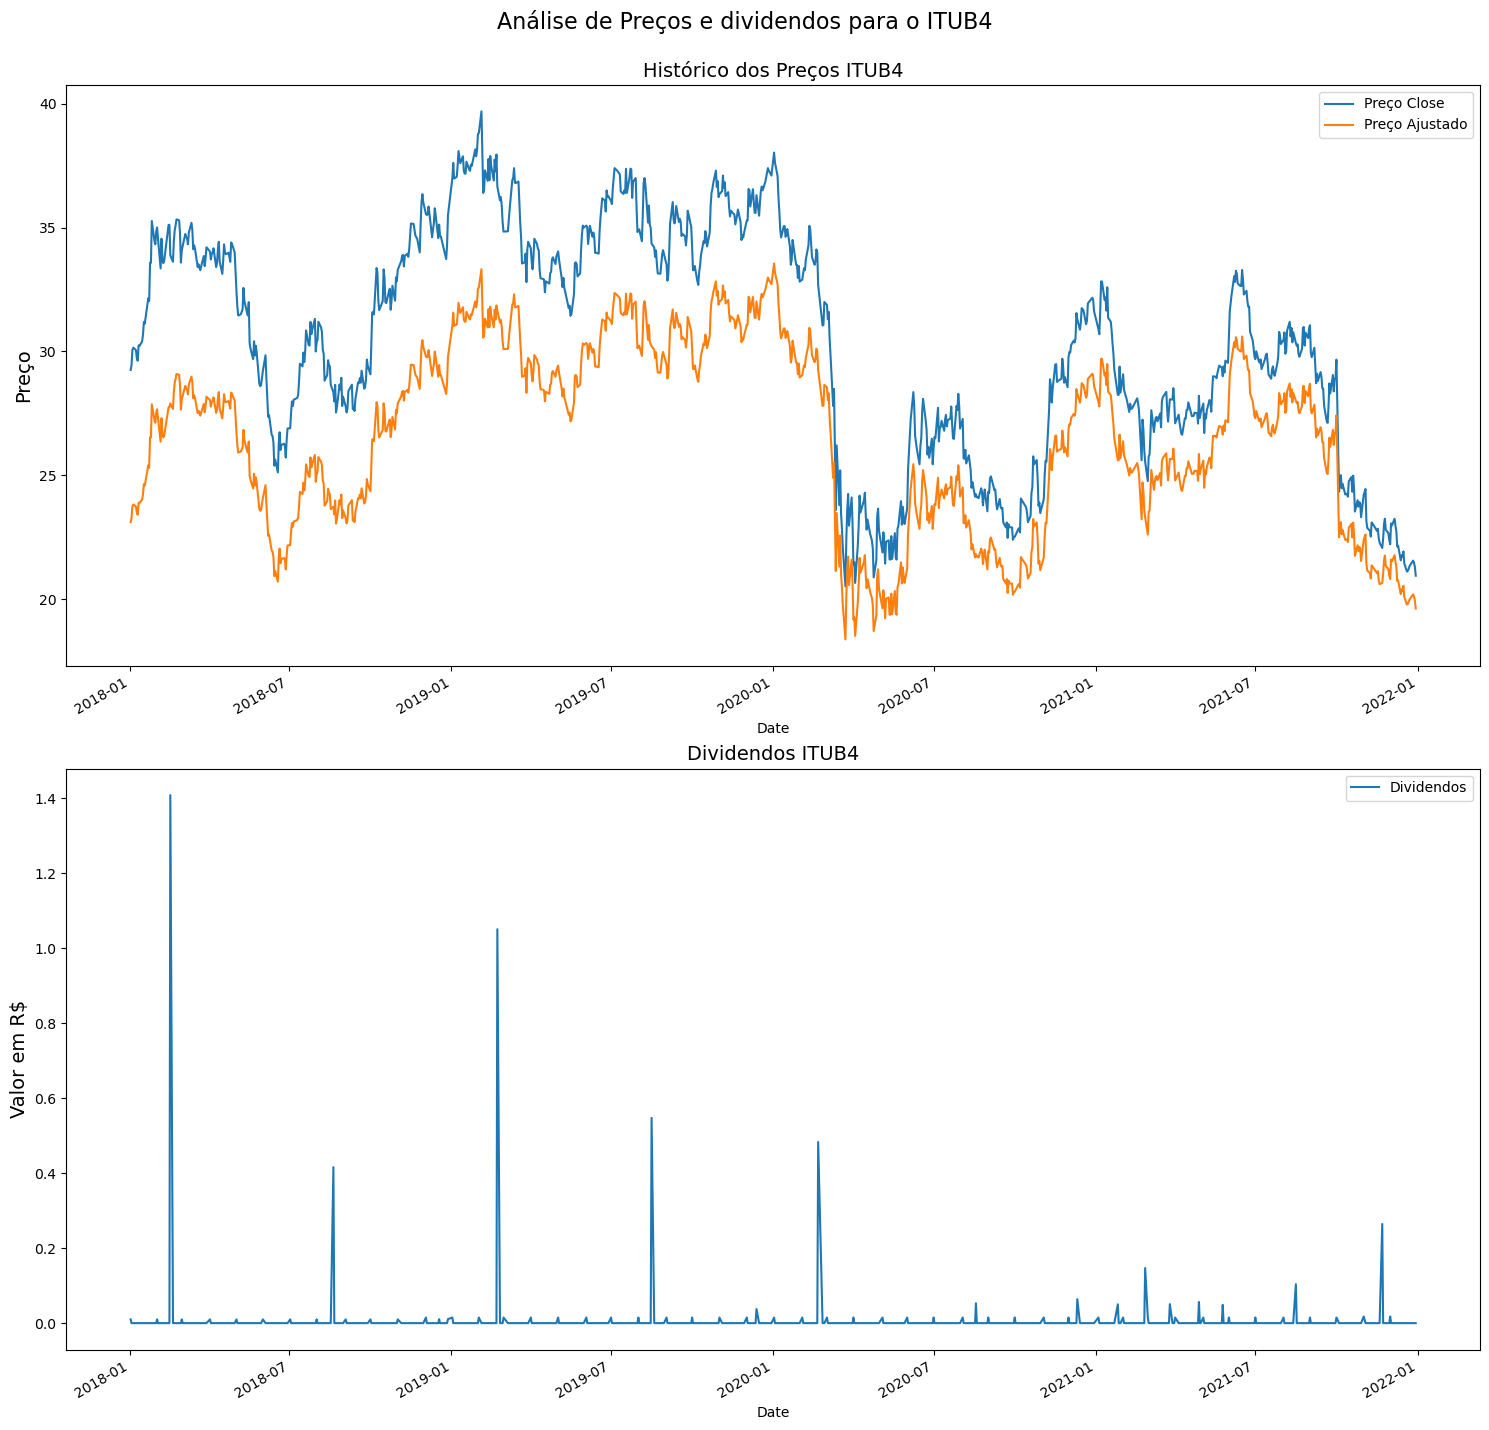

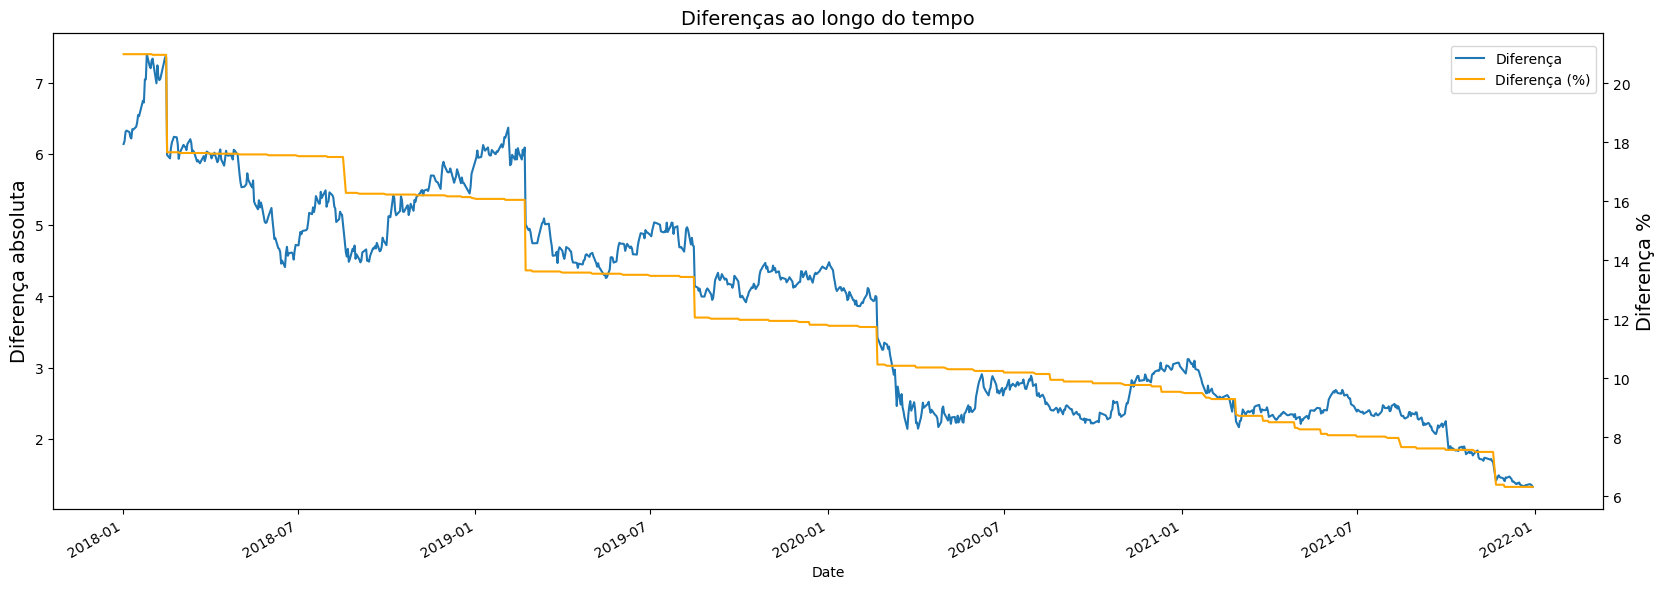

In [17]:
#Criação das figuras para gráficos de Preço e Dividendos

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

fig.suptitle('Análise de Preços e dividendos para o ITUB4', y=0.95, fontsize=16)

# Gráfico de Histórico dos preços
itub_data['Close'].plot(ax=axes[0], label='Preço Close')
itub_data['Adj Close'].plot(ax=axes[0], label='Preço Ajustado')
axes[0].set_title('Histórico dos Preços ITUB4', fontsize=14)
axes[0].set_ylabel('Preço',fontsize=14)
axes[0].legend(loc='upper right')

# Gráfico dos dividendos distribuídos no período
dividends_itub.plot(ax=axes[1], label='Dividendos')
axes[1].set_title('Dividendos ITUB4', fontsize=14)
axes[1].set_ylabel('Valor em R$', fontsize=14)
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

#Griação das figuras para gráfico de diferenças absolutas e percentuais
fig,axs = plt.subplots(figsize=(20,7))
itub_data['Diff'].plot(ax=axs,label='Diferença')

# Plotando a diferença relativa
axs2 = axs.twinx()
itub_data['Diff %'].plot(kind='line',ax=axs2,label='Diferença (%)',color='orange')

axs.set_title('Diferenças ao longo do tempo', fontsize=14)
axs.set_ylabel('Diferença absoluta', fontsize=14)
axs2.set_ylabel('Diferença %', fontsize=14)
fig.legend(bbox_to_anchor=(0.9,0.87))
plt.show()

### Análise de dados Relevantes

No início da série, observa-se uma diferença maior entre os preços de fechamento e os ajustados, acompanhada de um valor de dividendo mais elevado, o que reflete um maior distanciamento entre as curvas entre o início de 2018 e meados de 2020.

No período subsequente, o distanciamento entre as curvas diminui, assim como os valores dos dividendos distribuídos.

A diferença entre os preços, apresentada no gráfico "Diferenças ao longo do tempo", apresenta uma tendência decrescente, que pode ser interpretada como uma redução do valor dos dividendos e, consequentemente, um menor impacto no valor da ação (diminuição patrimonial) após as distribuições.

**Q1.3.** Escolha 2 ações das 50 estudadas, que tenham sido negociadas desde pelo menos 01/11/2017,
**deixe claro quais você escolheu**. Apresente graficamente o histórico de preços ajustados, de variação e a
distribuição dos retornos diários delas. Cada ação deve ter seus gráficos apresentados como output de uma única
célula.

In [ ]:
#baixando os dados históricos para escolher uma ação negociada desde a data solicitada até hoje

start_date = "2017-11-01"

data_2 = yf.download(tickers, start=start_date)["Adj Close"]

# Verificação de valores vazios
print('Ações negociadas desde 2017-01-01 que compõem o IBRX50 (Atualmente): ')
print(data_2.isnull().sum())



In [ ]:
#Dadas as informações da célula acima, escolho as ações da Vale e Petrobras para fazer a análise
ticker_1 = 'VALE3.SA'
ticker_2 = 'PETR4.SA'

### Gráficos VALE3

In [ ]:
#Obterndo o histórico dos preços ajustados
ticker_1_data = pd.DataFrame()
ticker_1_data['Adj Close'] = (data_2[ticker_1])
ticker_1_data['Variation'] = (data_2[ticker_1].pct_change())

#criando variáveis gráficas
figs,axes = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))

figs.suptitle(ticker_1)

#gráfico de preço ajustado
ticker_1_data['Adj Close'].plot(ax=axes[0])
axes[0].set_title('Preço Ajustado', fontsize = 14)
axes[0].set_ylabel('Preço', fontsize=14)
axes[0].legend(loc='lower right')

#gráfico de variação
ticker_1_data['Variation'].plot(ax=axes[1])
axes[1].set_title('Variação', fontsize=14)
axes[1].set_ylabel('% Variação', fontsize=14)
axes[1].legend(loc='lower right')

#gráfico de distribuição dos retornos diários
ticker_1_data['Variation'].plot.hist(bins=50,ax=axes[2])
axes[2].set_title('Distribuição dos Retornos Diários', fontsize=14)
axes[2].set_xlabel('Retornos diários', fontsize=14)

plt.tight_layout()
plt.show()

### Gráficos PETR4

In [ ]:
#Obterndo o histórico dos preços ajustados
ticker_2_data = pd.DataFrame()
ticker_2_data['Adj Close'] = (data_2[ticker_2])
ticker_2_data['Variation'] = (data_2[ticker_2].pct_change())

#criando variáveis gráficas
figs,axes = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))

figs.suptitle(ticker_2)

#gráfico de preço ajustado
ticker_2_data['Adj Close'].plot(ax=axes[0])
axes[0].set_title('Preço Ajustado', fontsize = 14)
axes[0].set_ylabel('Preço', fontsize=14)
axes[0].legend(loc='lower right')

#gráfico de variação
ticker_2_data['Variation'].plot(ax=axes[1])
axes[1].set_title('Variação', fontsize=14)
axes[1].set_ylabel('% Variação', fontsize=14)
axes[1].legend(loc='lower right')

#gráfico de distribuição dos retornos diários
ticker_2_data['Variation'].plot.hist(bins=50,ax=axes[2])
axes[2].set_title('Distribuição dos Retornos Diários', fontsize=14)
axes[2].set_xlabel('Retornos diários', fontsize=14)

plt.tight_layout()
plt.show()

**Q2.1.** Na página https://cvmweb.cvm.gov.br/SWB/default.asp?sg_sistema=fundosreg é possível
encontrar dados cadastrais, diários e de carteira de fundos de investimento no Brasil.

Utilize o python para desenvolver um scraper que, a partir de um CNPJ, consiga buscar o útimo valor
disponível do valor da cota e do valor do patrimonio líquido do fundo deste CNPJ, com a sua respectiva data. Como
exemplo utilize o seguinte CNPJ: 21.144.577/0001-47

In [ ]:
#CNPJ para teste da consulta
CNPJ = '21.144.577/0001-47'

### Função que consulta o patrimônio de um dado fundo

Com a biblioteca selenium e seus métodos, a consulta da última atualização do patrimônio de um CNPJ é realizada de modo a evitar um bloqueio no site da CVM e de modo a permitir uma iteração a partir de uma lista, para otimizar as consultas. 

O resultado final é armanezado em como um dicionário do Python.

In [ ]:
# Criação da função de consulta

def consulta_patrimonio(CNPJ):
    #Definição dos objetos para uso da consulta com o navegador chrome
    chrome_options = Options()
    chrome_options.add_argument("--headless")

    #chrome_driver_path = '/home/lucas/my_project_dir/chromedriver'
    chrome_driver_path ="C:\selenium\chromedriver_win32\chromedriver.exe"
    service = Service(executable_path=chrome_driver_path)

    #Definindo a URL com base na função de inspeção do hmtl e o CNPJ requisitado na função
    #do navegador para a página de consulta dos CNPJs
    url= "https://cvmweb.cvm.gov.br/SWB/Sistemas/SCW/CPublica/CConsolFdo/ResultBuscaParticFdo.aspx?CNPJNome="+CNPJ+"&TpPartic=0&Adm=false&SemFrame=.aspx"
        
    #Acessando a URL com o driver
    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.get(url)
    
    #Selecionando o botão de pesquisa do CNPJ incluído na url anterior
    submit_button = driver.find_element(By.ID, "ddlFundos__ctl0_Linkbutton2")
    submit_button.click()

    
    time.sleep(2)

    #Dentro da página procuramos pelo botão que direcionará para a página dos balanços
    submit_button = driver.find_element(By.ID, "Hyperlink2")
    submit_button.click()

    time.sleep(2)
    #Gravação a url da página obtida após a seleção do botão de balanços na variável "page_3"
    page_3 = driver.page_source
    competencia = driver.find_element(By.ID,'ddComptc')
    
    for i in competencia.find_elements(By.TAG_NAME,'option'):
        if i.get_attribute('selected'):
            data_atual = i.get_attribute('value')
    
    time.sleep(2)
    #finalizei a consulta com o scraper pois já nos encontramos na página necessária para 
    # obtenção dos dados
    driver.quit()

    #Utilização do método "read_hmtl" para leitura das tabela da url do objetvo "page_3"
    tabela = pd.read_html(page_3, header=0)

    #A variável acima retorna duas tabelas, sendo que as informação que queremos está na segunda
    #tabela, no caso de índice 1
    tabela_2 = tabela[1]

    #Manipulações necessários para tratamento da tabela e seleção das variáveis de interesse
    #após alguns teste, demonstrou-se necessário incluir um "try/except" pois em alguns cenários
    #o retorno do nome das colunas não vinham com espaço entre algumas palavras
    try:
        tabela_3 = tabela_2[['Dia','Patrimônio Líquido (R$)','Data da próxima informação do PL']]
        tabela_4 = tabela_3.fillna(value = 0, method=None)

        valor_fundo = tabela_4['Patrimônio Líquido (R$)'].to_list()
        
    #Nesse except não há espaço entre a palavra "Líquido e (R$) como também "próxima" e "informação"
    except:
        tabela_3 = tabela_2[['Dia','Patrimônio Líquido(R$)','Data da próximainformação do PL']]
        tabela_4 = tabela_3.fillna(value = 0, method=None)

        valor_fundo = tabela_4['Patrimônio Líquido(R$)'].to_list()
    
        
    #Após criação das listas acima, procuramos o índice com maior valor da lista para o a lista de 
    #valor do fundo para obtermos a data, na lista "dias" e "date" a partir desse índice
    index_max=[]
    for dado in valor_fundo:
        if dado != 0:
            valor_fundo.index(dado)
            index_max.append(valor_fundo.index(dado))

    dia_max = index_max[-1] + 1

    #determinação da última data a partir da variável "dia_max" com o mes_ano acima
    date_2 = f"{str(dia_max)}/"+ data_atual

    #Criação de um dicionário para armazenamento da consulta
    consulta_dict = {"CNPJ":CNPJ,"Data":date_2,"Patrimonio":valor_fundo[index_max[-1]]}

        

    return consulta_dict

In [ ]:
#Acionamento da Função para consulta
consulta_patrimonio(CNPJ)

**Q2.2.** Perceba que o site da CVM impoe restrições contra múltiplas pesquisas em um pequeno intervalo
de tempo. Utilizando a função da questão anterior monte um loop que pesquisa as mesmas informações para os
5 CNPJs abaixo, sem ser bloqueado pelo sistema da CVM, e salva essas informações em um arquivo .json:\
37.093.442/0001-30\
37.092.411/0001-64\
27.249.022/0001-46\
36.400.027/0001-19\
37.074.530/0001-94

### Importação de bibliotecas para resolução da questão e do Bônus

In [ ]:
import json
import re
import pickle

In [ ]:
#criação de uma lista a partir da string dos CNPJs
cnpjs=\
"""
37.093.442/0001-30
37.092.411/0001-64
27.249.022/0001-46
36.400.027/0001-19
37.074.530/0001-94"""

cnpjs = cnpjs.split()

In [ ]:
#Criação de lista para armazenamento do resultado do loop de consulta
consulta_retorno = []

for CNPJ in cnpjs:
    resultado = consulta_patrimonio(CNPJ)
    consulta_retorno.append(resultado)
    
#inclusão de uma pausa no código para evitar o bloquei do site
    time.sleep(2)

with open('consulta_retorno.json', 'w') as f:
    json.dump(consulta_retorno, f)

**Bonus.** \
Monte um código que busque a última composição da carteira completamente disponível destes 6
fundos, usando o mesmo site, e os salve como objeto serializado de um mesmo pandas DataFrame.

In [ ]:
#criação de uma lista a partir da string dos CNPJs
cnpjs_bonus=\
"""
21.144.577/0001-47
37.093.442/0001-30
37.092.411/0001-64
27.249.022/0001-46
36.400.027/0001-19
37.074.530/0001-94"""

cnpjs_bonus = cnpjs_bonus.split()

### Função que consulta a composição da carteiro totalmente disponível de um dado fundo

A Função abaixo segue os mesmos requisitos da função de consulta de patrimônio, porém retorna um dataframe que inclui uma coluna indicando a qual CNPJ de fundo a do dataframe pertence.

In [ ]:
def composicao_carteira(CNPJ):
    #Definição dos objetos para uso da consulta com o navegador chrome
    chrome_options = Options()
    chrome_options.add_argument("--headless")

    #chrome_driver_path = '/home/lucas/my_project_dir/chromedriver'
    chrome_driver_path ="C:\selenium\chromedriver_win32\chromedriver.exe"
    service = Service(executable_path=chrome_driver_path)

    #Definindo a URL com base na função de inspeção do hmtl e o CNPJ requisitado na função
    #do navegador para a página de consulta dos CNPJs
    url= "https://cvmweb.cvm.gov.br/SWB/Sistemas/SCW/CPublica/CConsolFdo/ResultBuscaParticFdo.aspx?CNPJNome="+CNPJ+"&TpPartic=0&Adm=false&SemFrame=.aspx"

    #Acessando a URL com o driver
    driver = webdriver.Chrome(service=service, options=chrome_options)
    driver.get(url)

    #Selecionando o botão de pesquisa do CNPJ incluído na url anterior
    submit_button = driver.find_element(By.ID, "ddlFundos__ctl0_Linkbutton2")
    submit_button.click()
    time.sleep(3)

    #Dentro da página procuramos pelo botão que direcionará para a página dos balanços
    submit_button = driver.find_elements(By.ID,"Hyperlink1")
    submit_button[1].click()
    time.sleep(3)

    #Gravação a url da página obtida após a seleção do botão de balanços na variável "page_3"
    page_3 = driver.page_source

    #finalizei a consulta com o scraper pois já nos encontramos na página necessária para 
    #obtenção dos dados
    driver.quit()

    #Utilização do método "read_hmtl" para leitura das tabela da url do objetvo "page_3"
    #Definição da tabela de índice 01 para sempre pegar a carteira completamente disponível
    tabela_carteira = pd.read_html(page_3, header=3)
    df1 = pd.DataFrame(tabela_carteira[1])
    df1['CNPJ'] = CNPJ
        
    return df1

In [ ]:
carteira_fundos = pd.DataFrame()
for cnpj in cnpjs_bonus:
    print(f'CNPJ {cnpj} adicionado à tabela \"carteira_fundos\"')
    carteira_fundos = pd.concat([carteira_fundos,composicao_carteira(cnpj)], ignore_index = True)
    time.sleep(5)
    
#Armazenamento do dataframe em um arquivo serializado a partir do DataFrame do Pandas
carteira_fundos.to_pickle('carteira_fundos.pkl')
df_pickle = pd.read_pickle('carteira_fundos.pkl')
df_pickle.head(10)